In [2]:
import time,json,requests
import geopandas as gpd
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d'%int(time.time()*1000)
data = json.loads(requests.get(url=url).json()['data'])
for i in data:
    print(i)

lastUpdateTime
chinaTotal
chinaAdd
isShowAdd
chinaDayList
chinaDayAddList
dailyNewAddHistory
dailyDeadRateHistory
confirmAddRank
areaTree
articleList


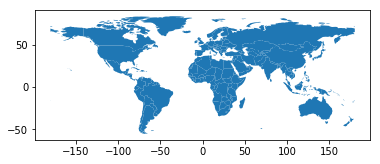

In [5]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world.plot()
plt.show()

In [7]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [22]:
#https://data.biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_CHN_shp.zip
mainland_map = gpd.read_file('/Users/yuanzan/Desktop/tmp/gadm36_CHN_shp/gadm36_CHN_1.shp')
city = gpd.read_file('/Users/yuanzan/Desktop/tmp/gadm36_CHN_shp/gadm36_CHN_2.shp')
xian = gpd.read_file('/Users/yuanzan/Desktop/tmp/gadm36_CHN_shp/gadm36_CHN_3.shp')

In [23]:
mainland_map.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,CHN,China,CHN.1_1,Anhui,Ānhuī,安徽|安徽,Shěng,Province,None,CN.AH,"POLYGON ((116.58147 30.04759, 116.57895 30.041..."
1,CHN,China,CHN.2_1,Beijing,Běijīng,北京|北京,Zhíxiáshì,Municipality,None,CN.BJ,"POLYGON ((116.23775 39.51794, 116.23721 39.522..."
2,CHN,China,CHN.3_1,Chongqing,Chóngqìng,重慶|重庆,Zhíxiáshì,Municipality,None,CN.CQ,"POLYGON ((109.23199 28.87890, 109.23277 28.872..."
3,CHN,China,CHN.4_1,Fujian,Fújiàn,福建,Shěng,Province,None,CN.FJ,"MULTIPOLYGON (((117.68903 23.53347, 117.68903 ..."
4,CHN,China,CHN.5_1,Gansu,Gānsù,甘肅|甘肃,Shěng,Province,None,CN.GS,"POLYGON ((101.77423 33.54804, 101.77228 33.549..."


In [21]:
city.head(2)

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,Ānqìng,安庆市,Dìjíshì,Prefecture City,None,None,"POLYGON ((116.58147 30.04759, 116.57895 30.041..."
1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.2_1,Bengbu,Bèngbù,蚌埠市,Dìjíshì,Prefecture City,None,None,"POLYGON ((117.52264 32.98103, 117.52283 32.978..."


In [20]:
xian.head(3)

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,CHN.1.1.1_1,Anqing,None,None,Xiànjíshì,County City,None,None,"POLYGON ((117.20921 30.62802, 117.21246 30.623..."
1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,CHN.1.1.2_1,Huaining,Huáiníng,怀宁县,Xiàn,County,None,None,"POLYGON ((116.48771 30.38063, 116.48775 30.385..."
2,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,安庆市,CHN.1.1.3_1,Qianshan,Qiánshān,潜山县,Xiàn,County,None,None,"POLYGON ((116.47166 30.45662, 116.46768 30.457..."


In [24]:
HK_map = gpd.read_file('/Users/yuanzan/Desktop/tmp/map/gadm36_HKG_shp/gadm36_HKG_0.shp')
HK_p = pd.DataFrame({'GID_0':'CHN',
                     'NAME_0':'China',
                     'GID_1':'CHN.32_1',
                     'NAME_1':'Hongkong',
                     'VARNAME_1':'Hongkong',
                     'NL_NAME_1':'香港',
                     'TYPE_1':'tebiexingzhengqu',
                     'ENGTYPE_1':'SAR',
                     'CC_1':None,
                     'HASC_1':'CN.HK',
                     'geometry':None},
                   index=[0])
HK_p.loc[0,'geometry'] = HK_map.loc[0,'geometry']

MAC_map = gpd.read_file('/Users/yuanzan/Desktop/tmp/map/gadm36_MAC_shp/gadm36_MAC_0.shp')
MAC_p = pd.DataFrame({'GID_0':'CHN',
                     'NAME_0':'China',
                     'GID_1':'CHN.33_1',
                     'NAME_1':'Macao',
                     'VARNAME_1':'Macao',
                     'NL_NAME_1':'澳门',
                     'TYPE_1':'tebiexingzhengqu',
                     'ENGTYPE_1':'SAR',
                     'CC_1':None,
                     'HASC_1':'CN.MAC',
                     'geometry':None},
                   index=[0])
MAC_p.loc[0,'geometry'] = MAC_map.loc[0,'geometry']

TW_map = gpd.read_file('/Users/yuanzan/Desktop/tmp/map/gadm36_TWN_shp/gadm36_TWN_0.shp')
TW_p = pd.DataFrame({'GID_0':'CHN',
                     'NAME_0':'China',
                     'GID_1':'CHN.34_1',
                     'NAME_1':'Taiwan',
                     'VARNAME_1':'Taiwan',
                     'NL_NAME_1':'台湾',
                     'TYPE_1':'Shěng',
                     'ENGTYPE_1':'Province',
                     'CC_1':None,
                     'HASC_1':'CN.TW',
                     'geometry':None},
                   index=[0])
TW_p.loc[0,'geometry'] = TW_map.loc[0,'geometry']

mainland_map = mainland_map.append(HK_p, ignore_index=True)
mainland_map = mainland_map.append(MAC_p, ignore_index=True)
mainland_map = mainland_map.append(TW_p, ignore_index=True)

In [25]:
mainland_map_c = mainland_map.copy()
for i, v in mainland_map.iterrows():
    tmp = v['NL_NAME_1'].split("|")
    if len(tmp)==2:
        jian = tmp[1]
        if '自治区' in jian:
            if jian == "内蒙古自治区":
                mainland_map_c.loc[i,"NL_NAME_1"] = "内蒙古"
            else:
                mainland_map_c.loc[i,"NL_NAME_1"] = jian[0:2]
        else:
            if tmp[0] == "黑龙江省":
                mainland_map_c.loc[i,"NL_NAME_1"] = "黑龙江"
            else:
                mainland_map_c.loc[i,"NL_NAME_1"] = jian


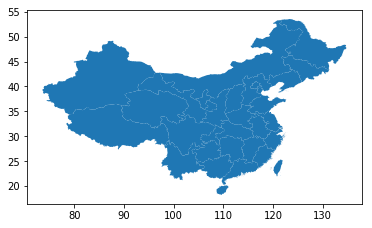

In [26]:
mainland_map_c.plot()

In [27]:
mainland_map_c['confirm'] = 0
mainland_map_c.index = mainland_map_c['NL_NAME_1']
mainland_map_c
for i in data['areaTree'][0]['children']:
    mainland_map_c.loc[i['name'], 'confirm'] = i['total']['confirm']

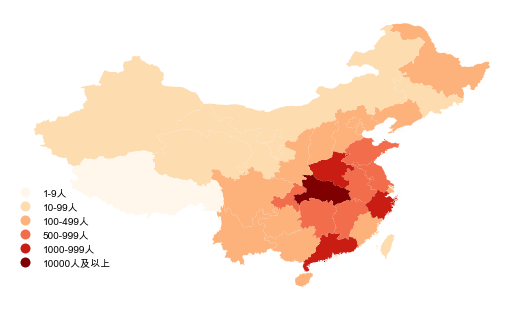

In [31]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial Unicode MS'

def set_frame(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

ax = mainland_map_c.plot(column="confirm", scheme="User_Defined", classification_kwds=dict(bins=[10,100,500,1000,10000]), alpha= 1, figsize=(9,9), cmap='OrRd', legend=True)
leg = ax.get_legend()
leg._loc = [0,0.1]
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')

legend_labels = ['1-9人','10-99人','100-499人','500-999人','1000-999人','10000人及以上']
for i,v in enumerate(leg.get_texts()):
    v.set_text(legend_labels[i])
   
set_frame(ax)
#mainland_map_c.apply(lambda x: ax.annotate(s=x.NL_NAME_1, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);


In [32]:
city_map = gpd.read_file('/Users/yuanzan/Desktop/tmp/gadm36_CHN_shp/gadm36_CHN_2.shp')

city_map_hebei = city_map[city_map['NL_NAME_1']=='河北']
city_map_hebei_c = city_map_hebei.copy() 

for i,v in city_map_hebei.iterrows():
    city_map_hebei_c.loc[i,"NL_NAME_2"] = v['NL_NAME_2'].rstrip('市')
    
city_map_hebei_c['confirm'] = 0
city_map_hebei_c.index = city_map_hebei_c['NL_NAME_2']

In [33]:
for i in data['areaTree'][0]['children']:
    if i['name'] == '河北':
        for ii in i['children']:
            city_map_hebei_c.loc[ii['name'],'confirm'] = ii['total']['confirm']
            

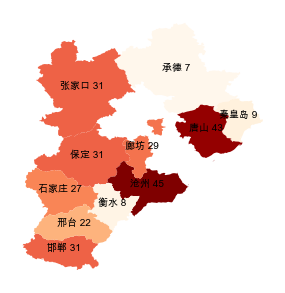

In [34]:
ax = city_map_hebei_c.plot(column='confirm', figsize=(5,5), cmap='OrRd', legend=False)
city_map_hebei_c.apply(lambda x: ax.annotate(s='{0} {1}'.format(x.NL_NAME_2,x.confirm), xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

set_frame(ax)